# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum
## 02.19.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

In [2]:
sns.set_style(style='whitegrid')

In [23]:
# -------- PRIMARY PARAMETERS --------
# Mass of pendulum [kg]
m = 1
# Length of pendulum L [m]
L = 1.5
# Damping coefficient q
q = 0
# Driving frequencey Omega_D
Omega_D = 0
# Driving amplitude F_D
F_D = 0
# Theta(0)
theta = 80
theta *= np.pi/180
# Omega(ω)
omega = 0
# Integration time t_iteration
t_iteration = 20
# Stepsize
dt = 0.1


# -------- OTHERS --------
# Accuracy
accuracy = 1e-6

In [24]:
def mode_choose(linearity, mode):
    
    current_mode = ('..\Release\pendulum.exe ' +
                      linearity + ' ' +
                      mode + ' ' +
                      str(m) + ' ' +
                      str(L) + ' ' +
                      str(q) + ' ' +
                      str(Omega_D) + ' ' +
                      str(F_D) + ' ' +
                      str(theta) + ' ' +
                      str(omega) + ' ' +
                      str(t_iteration) + ' ' +
                      str(dt) + ' ' +
                      str(accuracy)
                     )
    
    return(current_mode)

In [25]:
linearity = 'nonlinear'

mode_runge = mode_choose(linearity, mode='runge')
mode_rkck = mode_choose(linearity, mode='rkck')
mode_euler = mode_choose(linearity, mode='euler')
mode_cromer = mode_choose(linearity, mode='eulercromer')

mode_adapt_runge = mode_choose(linearity, mode='adapt_runge')
mode_adapt_rkck = mode_choose(linearity, mode='adapt_rkck')

In [26]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum.dat')

os.system(mode_rkck)
data_rkck = np.genfromtxt('pendulum.dat')

os.system(mode_euler)
data_euler = np.genfromtxt('pendulum.dat')

os.system(mode_cromer)
data_eulercromer = np.genfromtxt('pendulum.dat')

os.system(mode_adapt_runge)
data_adapt_runge = np.genfromtxt('pendulum.dat')

os.system(mode_adapt_rkck)
data_adapt_rkck = np.genfromtxt('pendulum.dat')

In [27]:
steps = 1
image_dpi = 150
image_format = 'pdf'

## 4th-order Runge-Kutta, simple and adaptive version

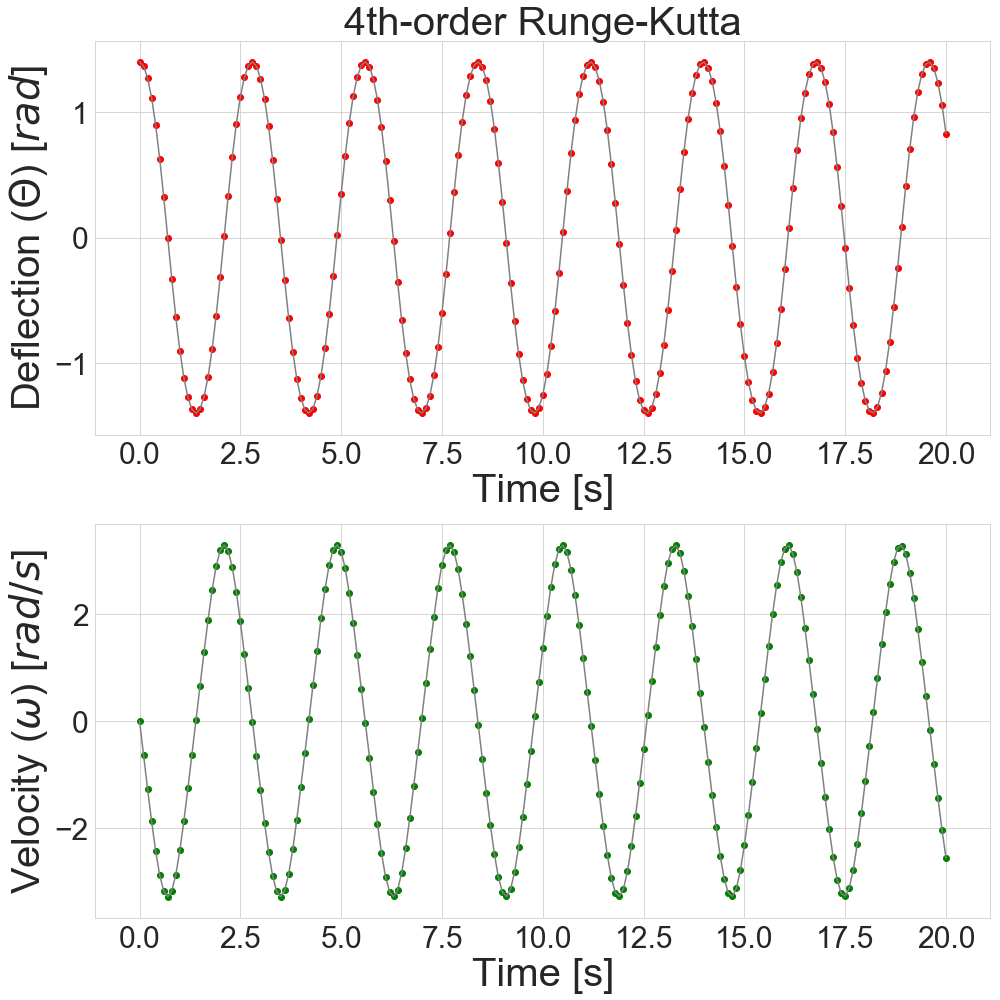

In [28]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='grey')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,2], color='grey')

axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1], color='red')
axes[1].scatter(data_runge[::steps,0], data_runge[::steps,2], color='green')

axes[0].set_title('4th-order Runge-Kutta', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_runge.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

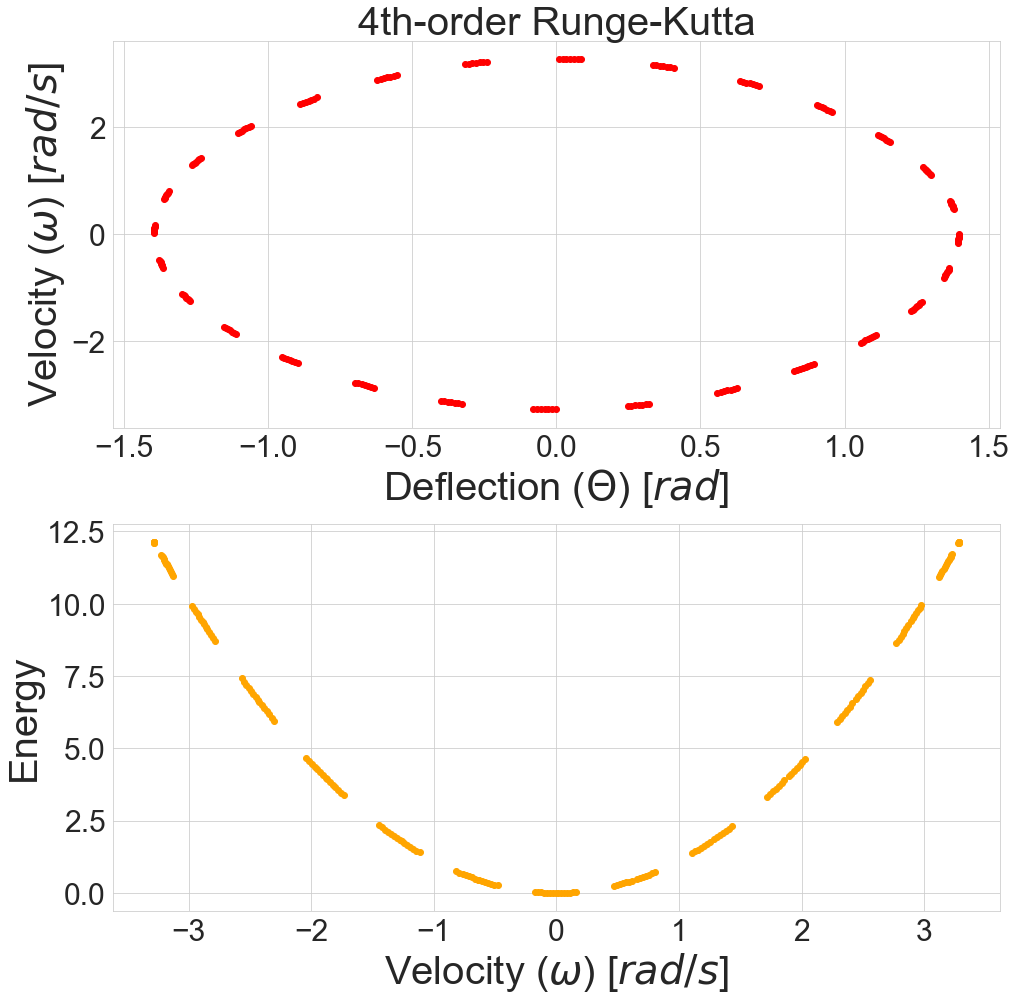

In [33]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].scatter(data_runge[::steps,1], data_runge[::steps,2], color='red')
axes[1].scatter(data_runge[::steps,2], data_runge[::steps,4], color='orange')

axes[0].set_title('4th-order Runge-Kutta', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

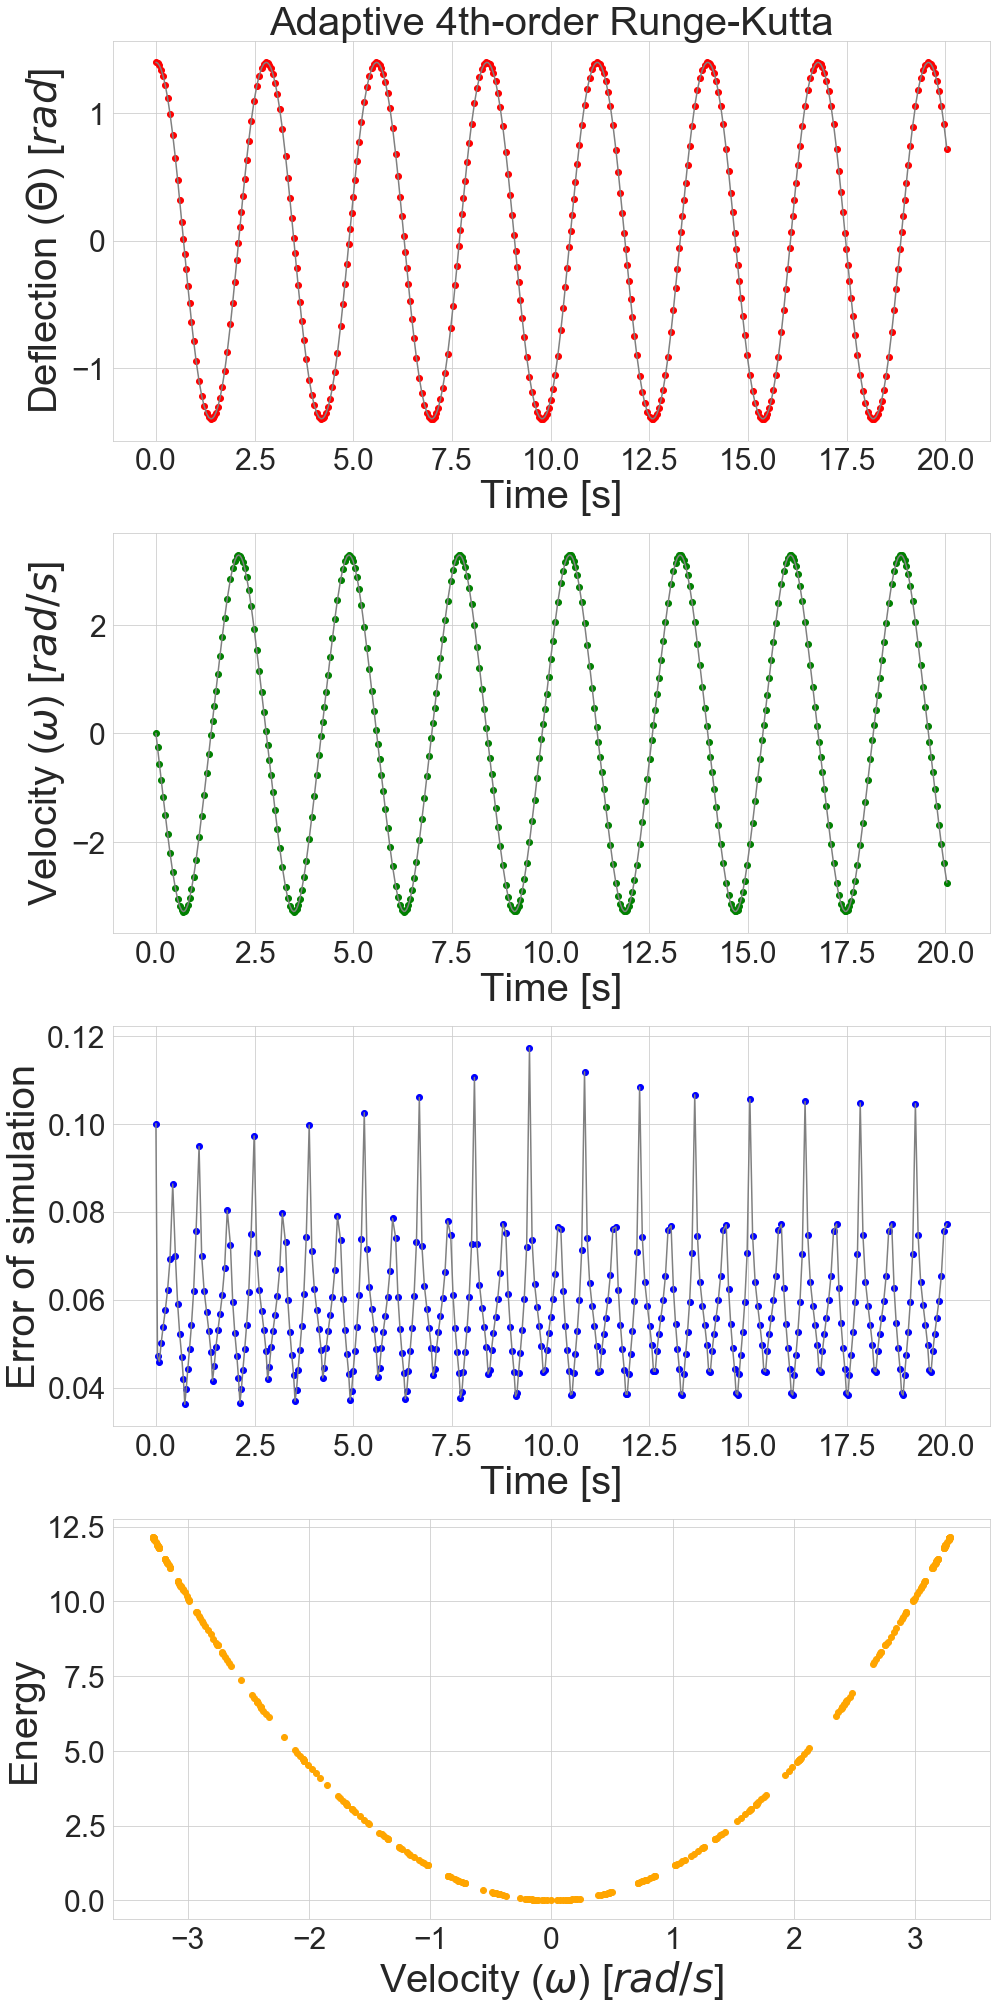

In [9]:
nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_adapt_runge[::steps,0], data_adapt_runge[::steps,1], color='grey')
axes[1].plot(data_adapt_runge[::steps,0], data_adapt_runge[::steps,2], color='grey')
axes[2].plot(data_adapt_runge[::steps,0], data_adapt_runge[::steps,3], color='grey')

axes[0].scatter(data_adapt_runge[::steps,0], data_adapt_runge[::steps,1], color='red')
axes[1].scatter(data_adapt_runge[::steps,0], data_adapt_runge[::steps,2], color='green')
axes[2].scatter(data_adapt_runge[::steps,0], data_adapt_runge[::steps,3], color='blue')
axes[3].scatter(data_adapt_runge[::steps,2], data_adapt_runge[::steps,4], color='orange')

axes[0].set_title('Adaptive 4th-order Runge-Kutta', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)
axes[2].set_xlabel('Time [s]', fontsize=40)
axes[3].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[2].set_ylabel('Error of simulation', fontsize=40)
axes[3].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)
axes[3].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_adapt_runge.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

## 4th-order Runga-Kutta, various masses

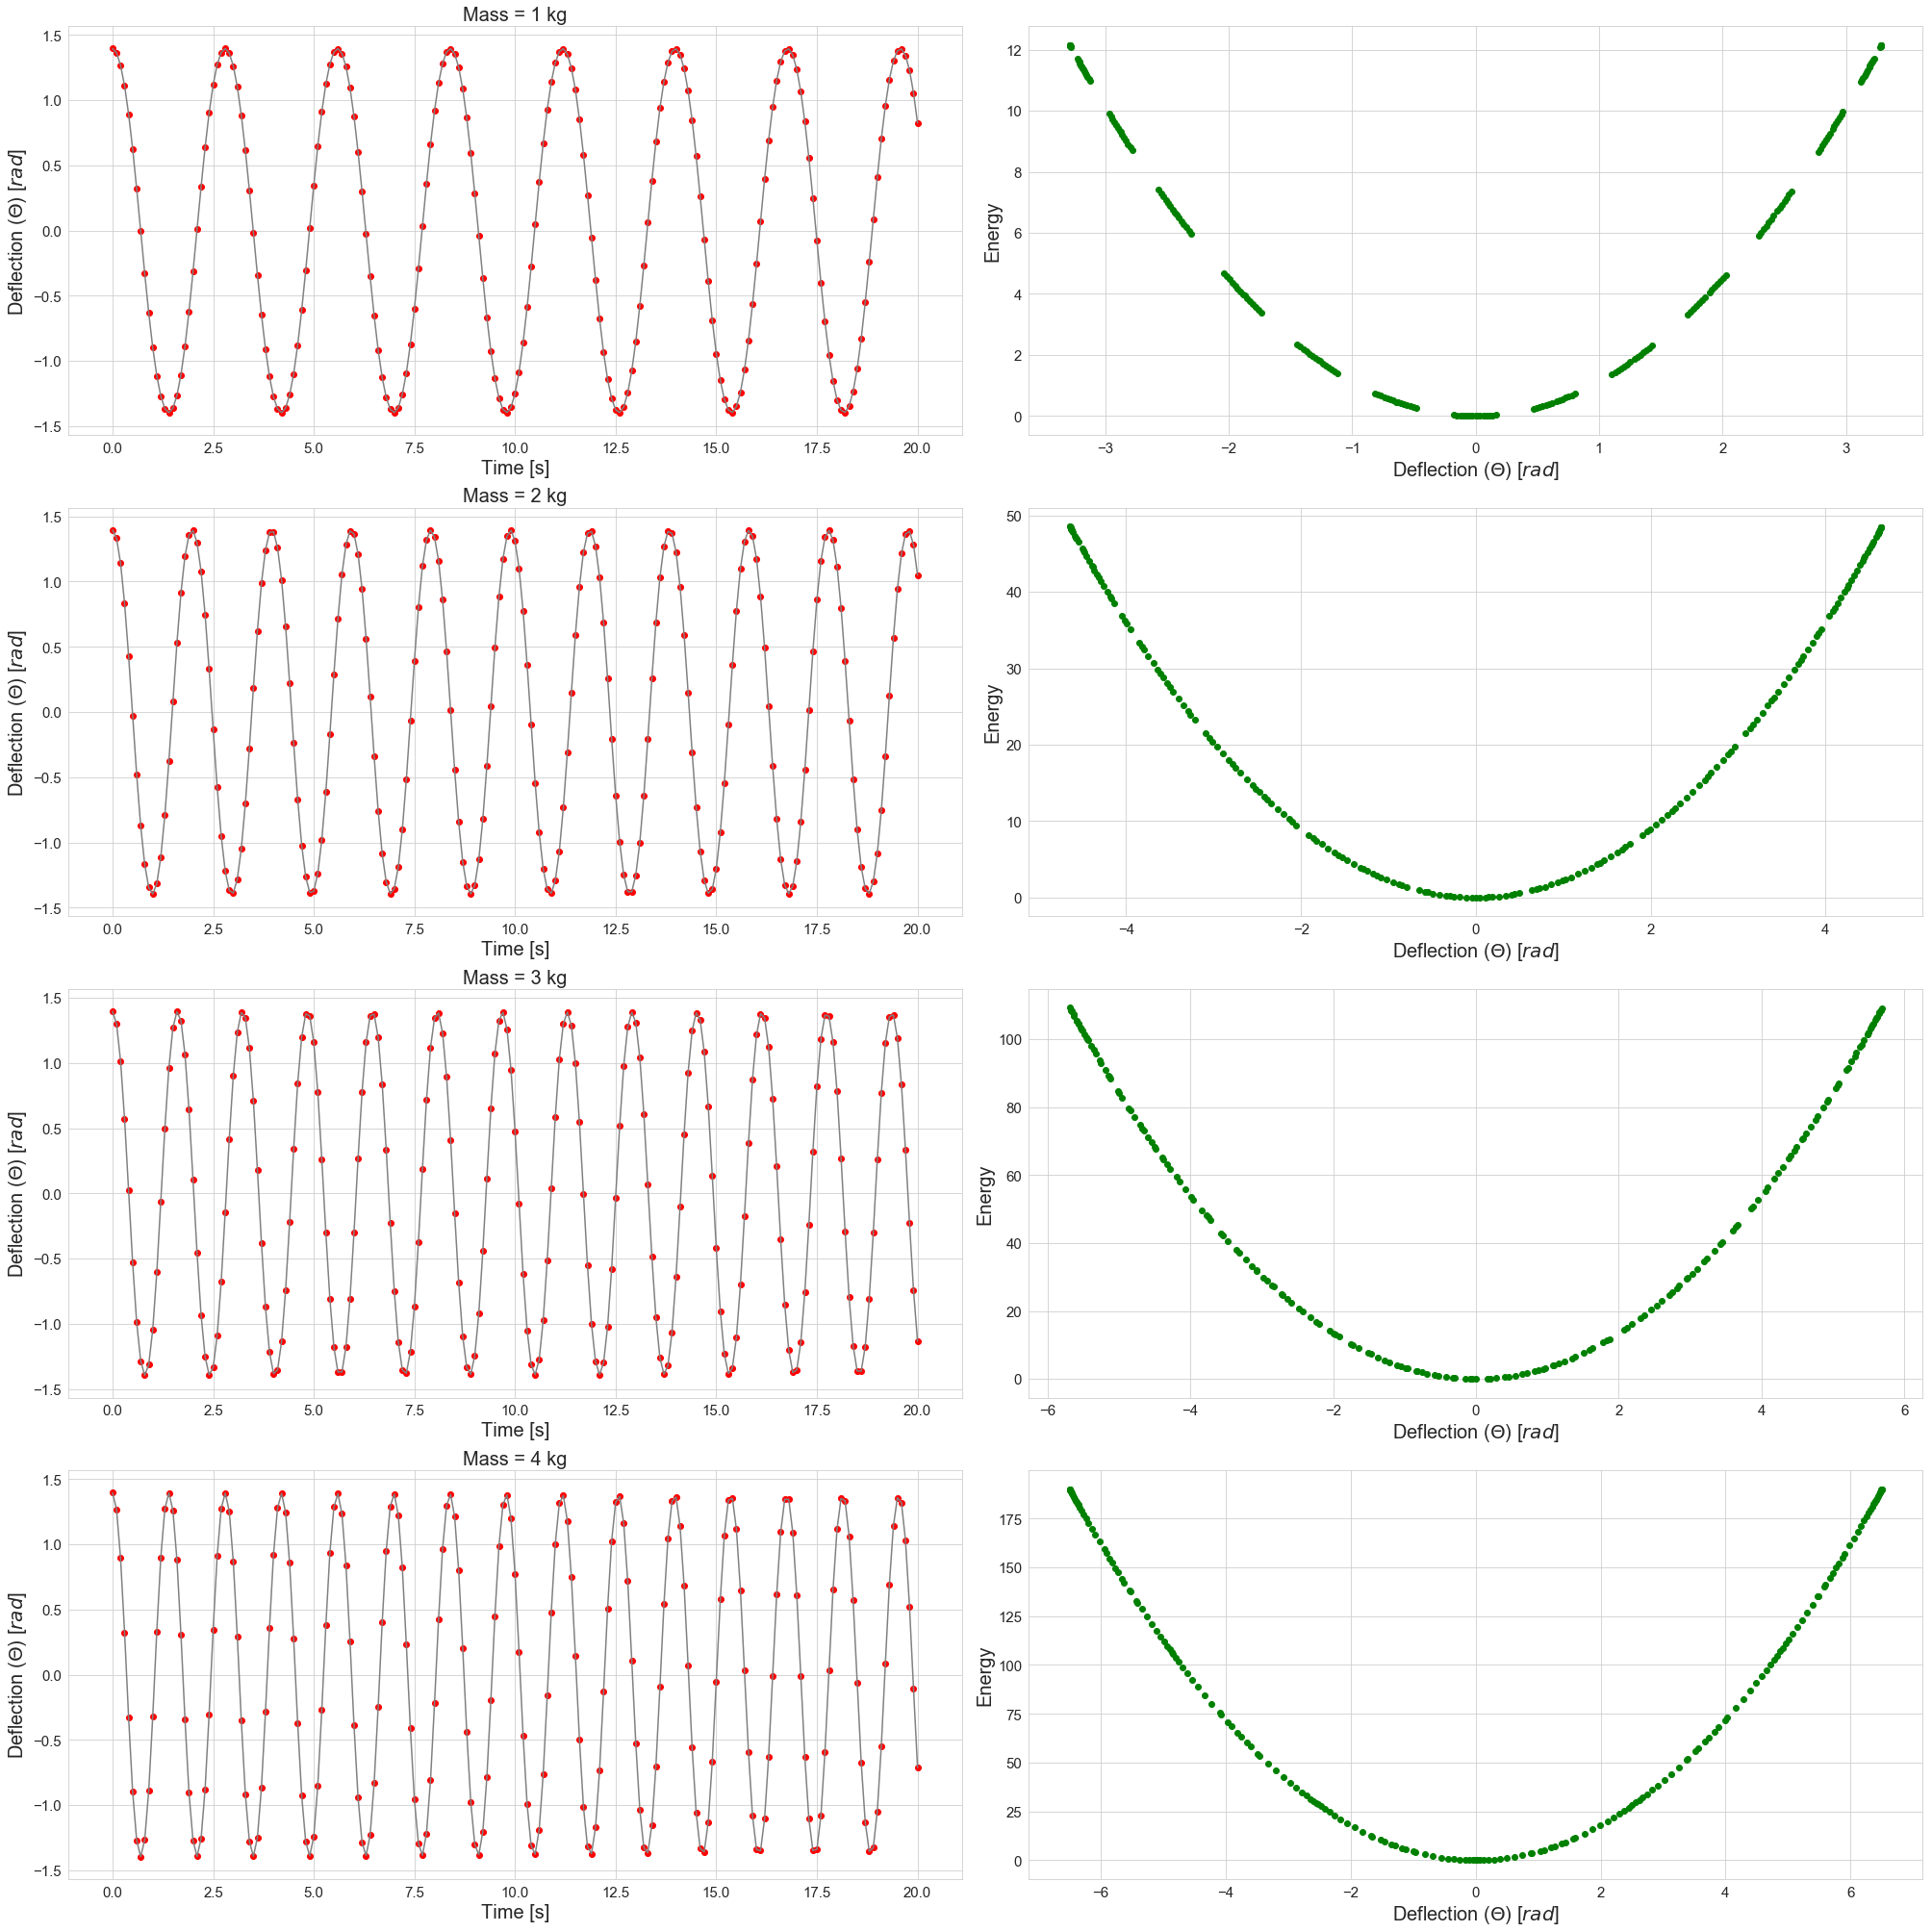

In [10]:
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

m_temp = m
for i in range(0,nrows):
    
    m = m_temp * (i+1)
    mode_runge = mode_choose(linearity, mode='runge')
    os.system(mode_runge)
    data_runge_mass = np.genfromtxt('pendulum.dat')

    axes[i][0].plot(data_runge_mass[::steps,0], data_runge_mass[::steps,1], color='grey')
    axes[i][0].scatter(data_runge_mass[::steps,0], data_runge_mass[::steps,1], color='red')
    axes[i][1].scatter(data_runge_mass[::steps,2], data_runge_mass[::steps,4], color='green')

    axes[i][0].set_title('Mass = ' + str(m) + ' kg', fontsize=20)
    
    axes[i][0].set_xlabel('Time [s]', fontsize=20)
    axes[i][0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=20)
    axes[i][1].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=20)
    axes[i][1].set_ylabel('Energy', fontsize=20)

    axes[i][0].tick_params(axis='both', which='major', labelsize=15)
    axes[i][1].tick_params(axis='both', which='major', labelsize=15)

m = m_temp
fig.tight_layout()
plt.show()

## Runge-Kutta-Cash-Karp, simple and adaptive version

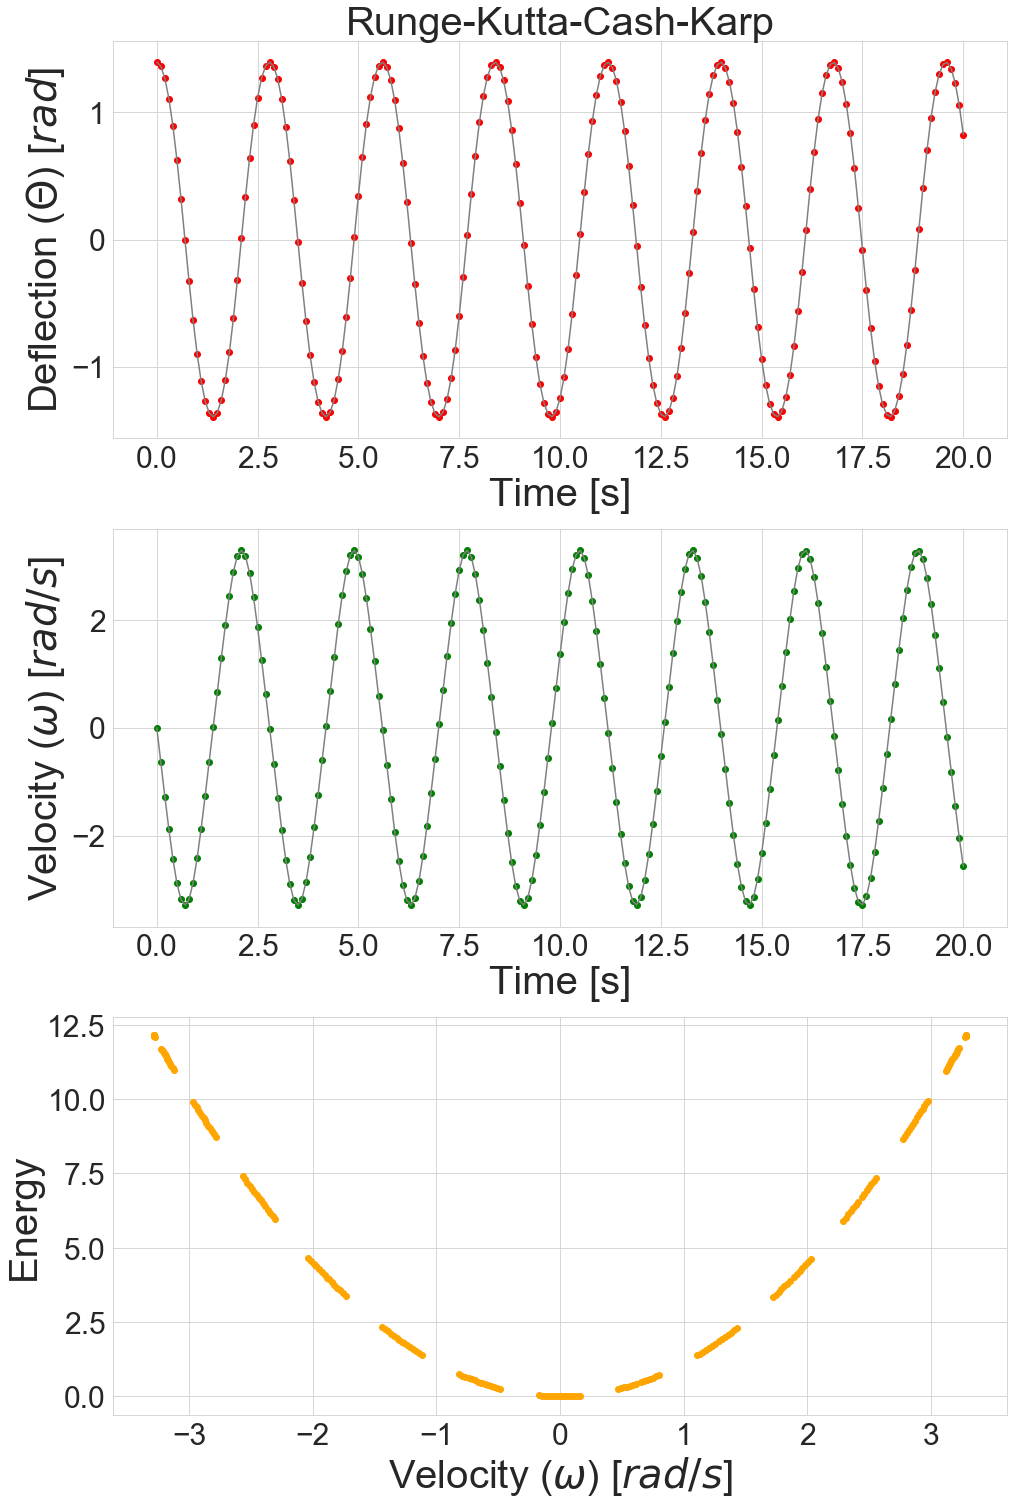

In [11]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='grey')
axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,2], color='grey')

axes[0].scatter(data_rkck[::steps,0], data_rkck[::steps,1], color='red')
axes[1].scatter(data_rkck[::steps,0], data_rkck[::steps,2], color='green')
axes[2].scatter(data_rkck[::steps,2], data_rkck[::steps,4], color='orange')

axes[0].set_title('Runge-Kutta-Cash-Karp', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)
axes[2].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[2].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_rkck.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

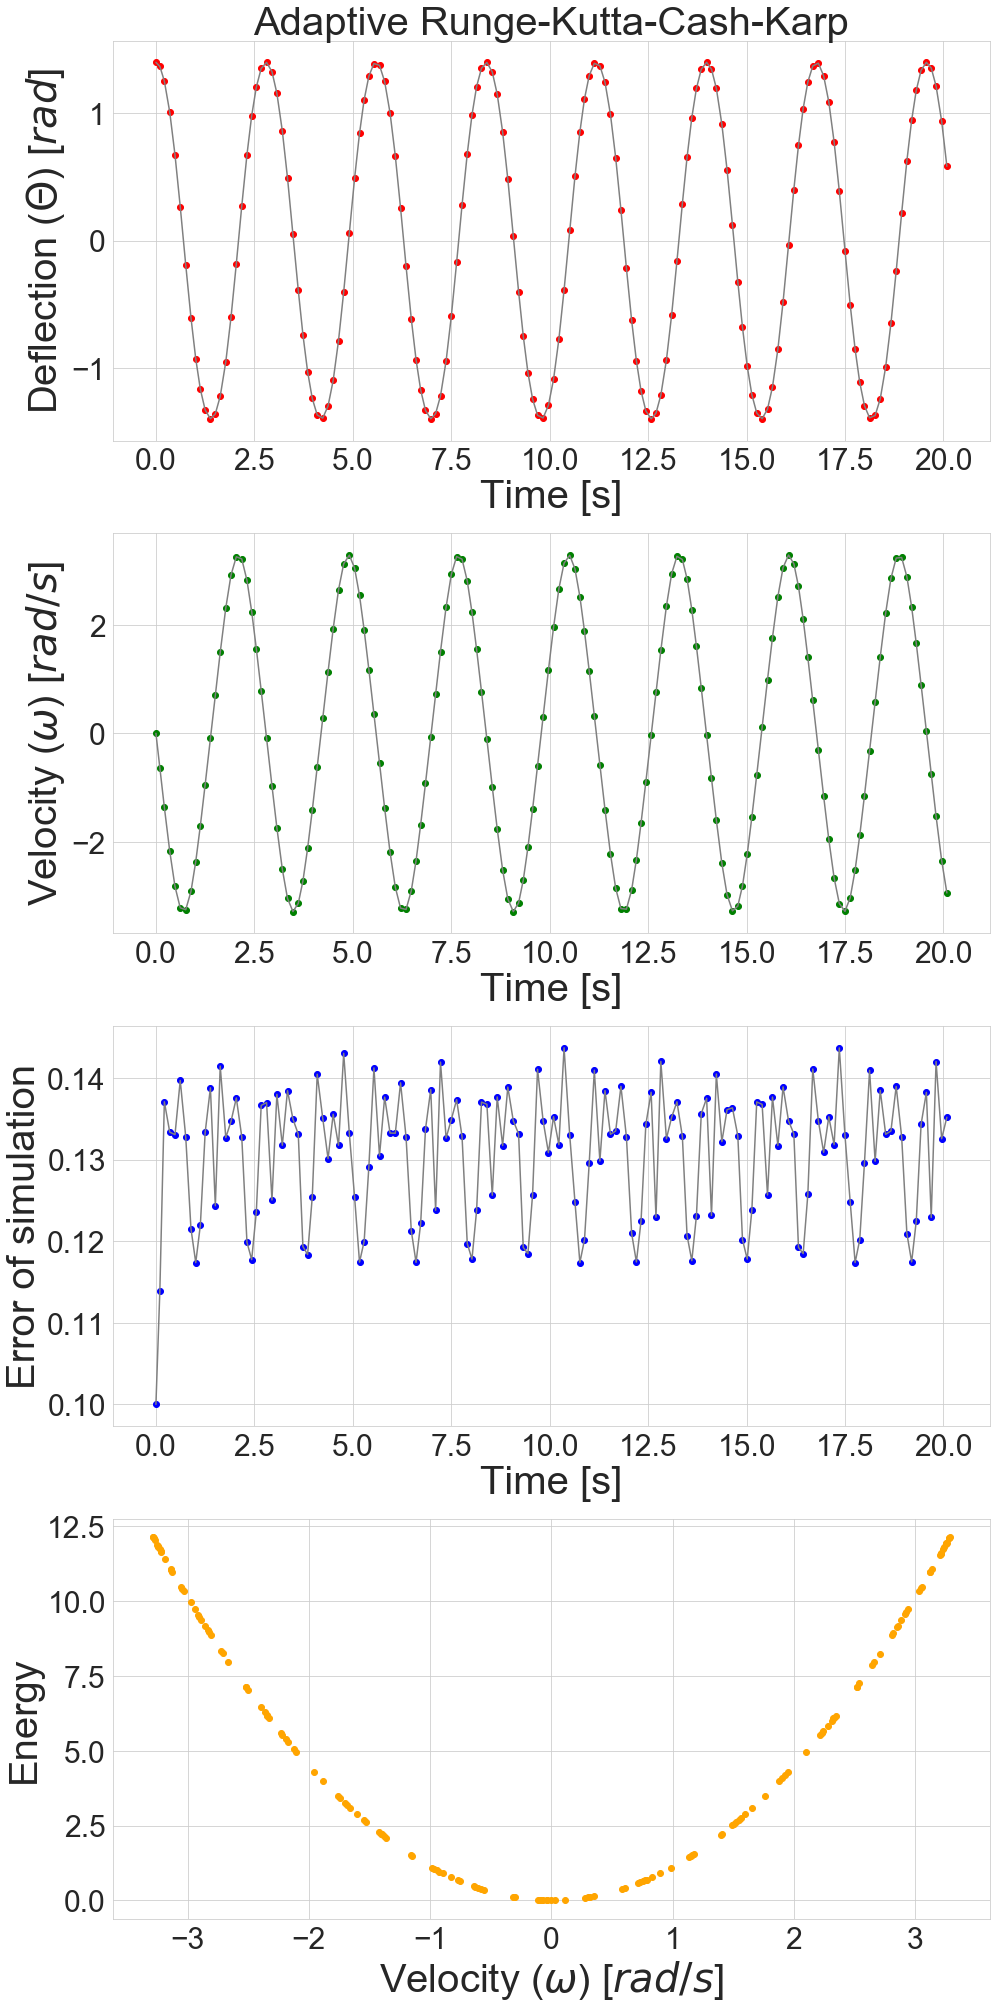

In [12]:
nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,1], color='grey')
axes[1].plot(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,2], color='grey')
axes[2].plot(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,3], color='grey')

axes[0].scatter(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,1], color='red')
axes[1].scatter(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,2], color='green')
axes[2].scatter(data_adapt_rkck[::steps,0], data_adapt_rkck[::steps,3], color='blue')
axes[3].scatter(data_adapt_rkck[::steps,2], data_adapt_rkck[::steps,4], color='orange')

axes[0].set_title('Adaptive Runge-Kutta-Cash-Karp', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)
axes[2].set_xlabel('Time [s]', fontsize=40)
axes[3].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[2].set_ylabel('Error of simulation', fontsize=40)
axes[3].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)
axes[3].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_adapt_rkck.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

## Euler

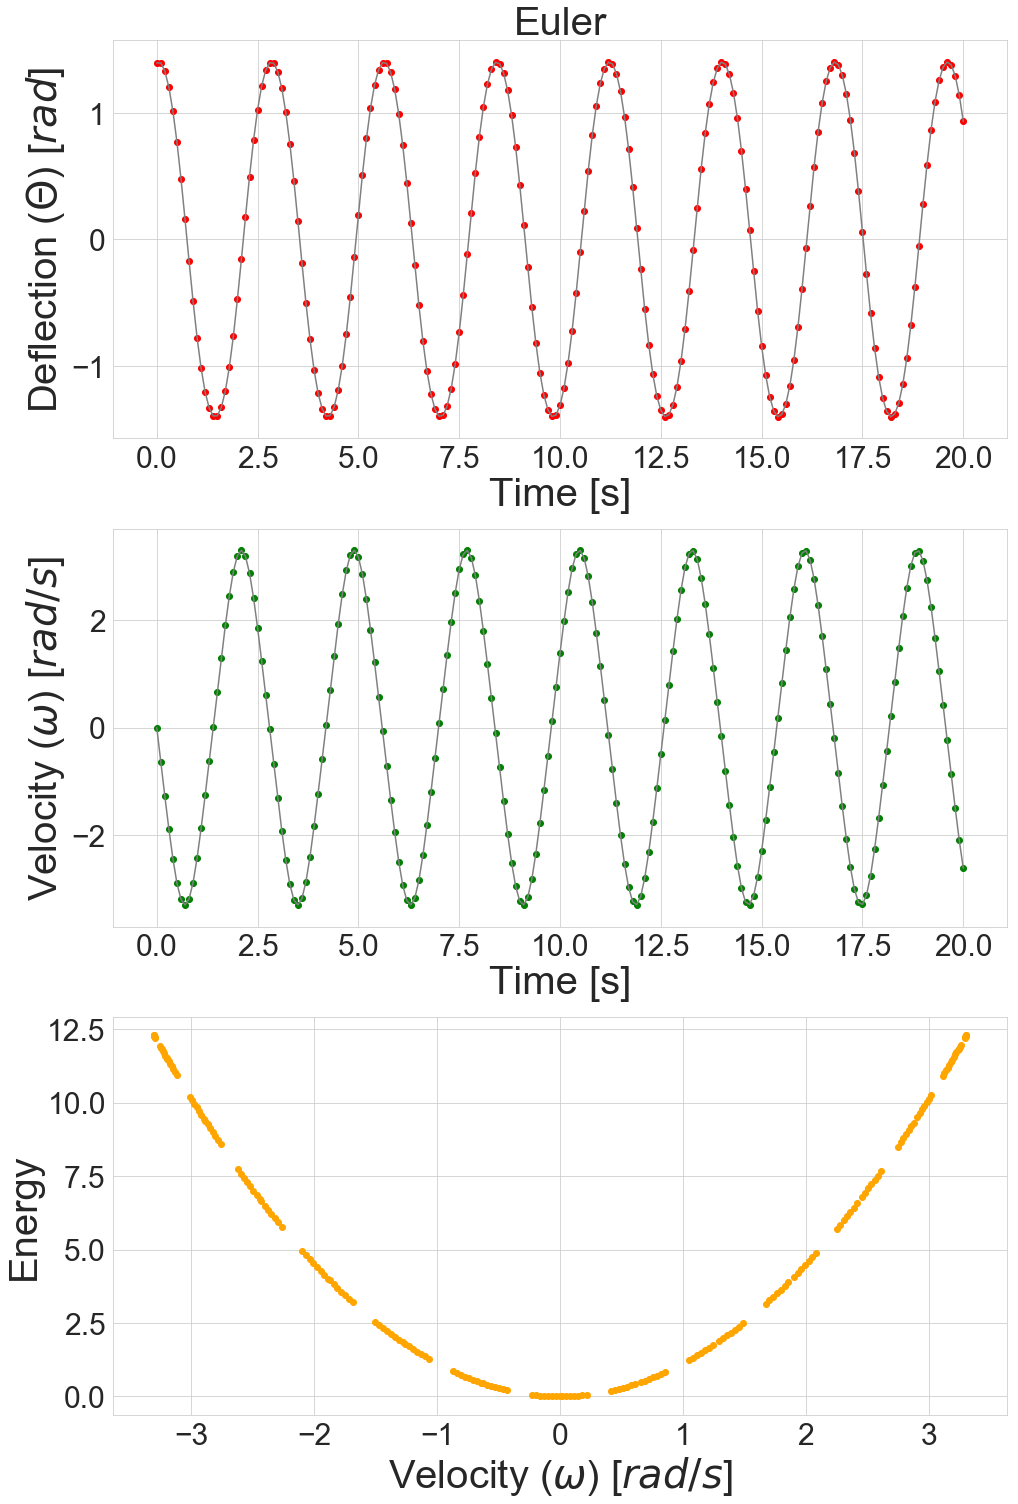

In [13]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_euler[::steps,0], data_euler[::steps,1], color='grey')
axes[1].plot(data_euler[::steps,0], data_euler[::steps,2], color='grey')

axes[0].scatter(data_euler[::steps,0], data_euler[::steps,1], color='red')
axes[1].scatter(data_euler[::steps,0], data_euler[::steps,2], color='green')
axes[2].scatter(data_euler[::steps,2], data_euler[::steps,4], color='orange')

axes[0].set_title('Euler', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)
axes[2].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[2].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_euler.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

## Euler-Cromer

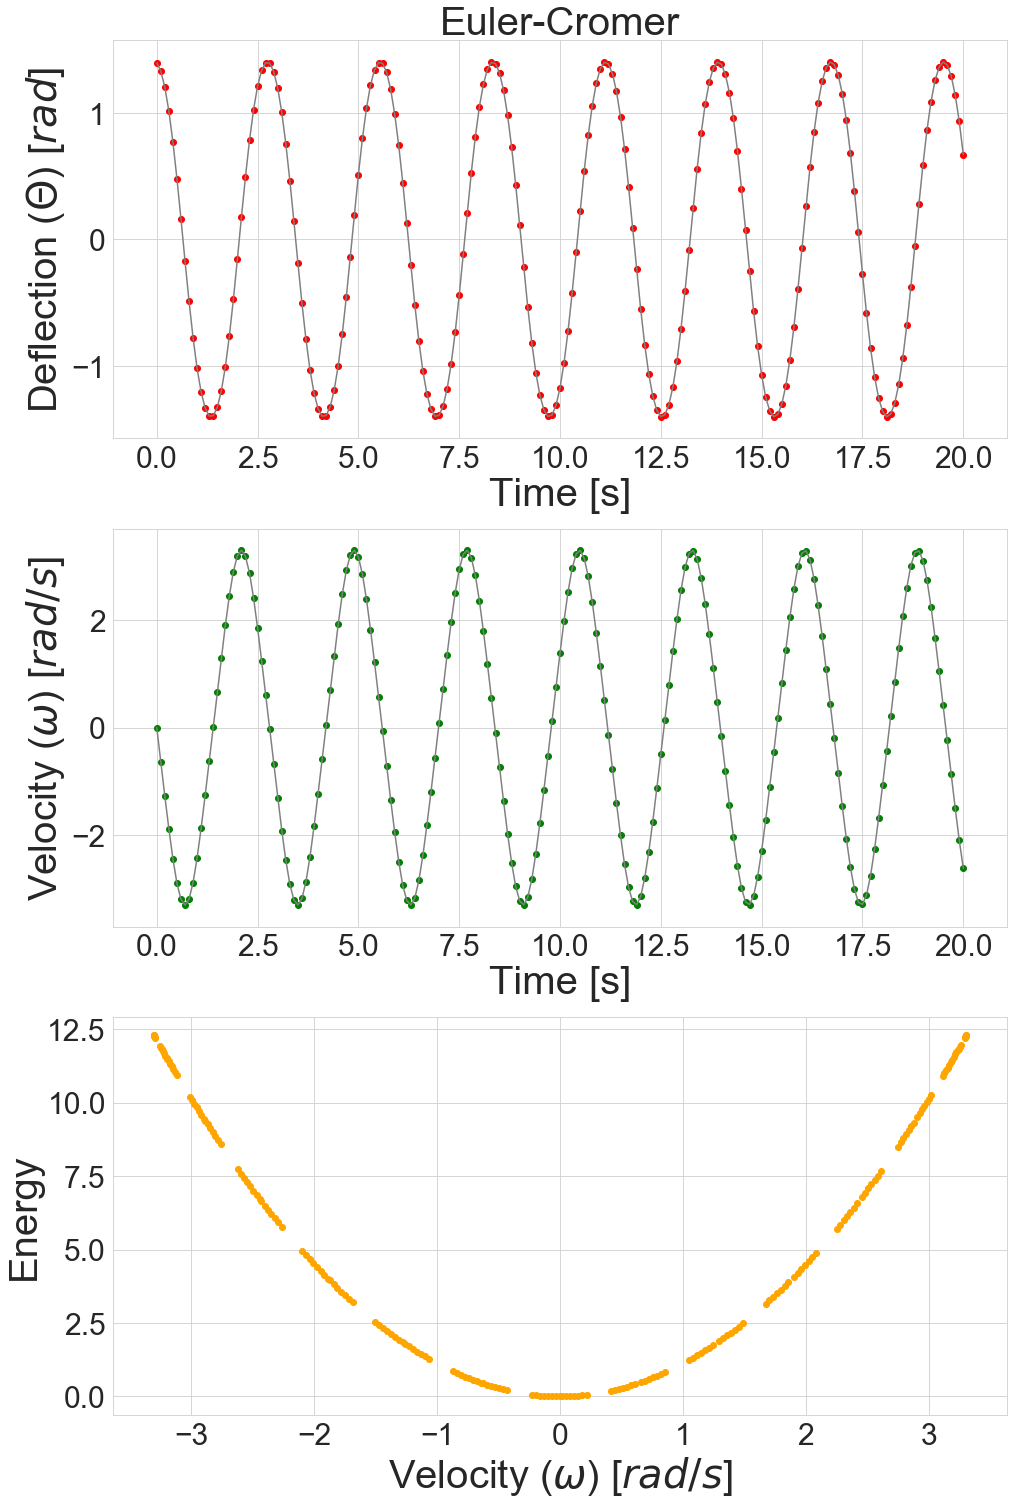

In [14]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_eulercromer[::steps,0], data_eulercromer[::steps,1], color='grey')
axes[1].plot(data_eulercromer[::steps,0], data_eulercromer[::steps,2], color='grey')

axes[0].scatter(data_eulercromer[::steps,0], data_eulercromer[::steps,1], color='red')
axes[1].scatter(data_eulercromer[::steps,0], data_eulercromer[::steps,2], color='green')
axes[2].scatter(data_eulercromer[::steps,2], data_eulercromer[::steps,4], color='orange')

axes[0].set_title('Euler-Cromer', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)
axes[2].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[2].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_eulercromer.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

## Runtime

In [15]:
t_min = 10
t_max = 130

run_time_runge = np.empty((t_max+1 - t_min))
run_time_rkck = np.empty((t_max+1 - t_min))
run_time_euler = np.empty((t_max+1 - t_min))
run_time_eulercromer = np.empty((t_max+1 - t_min))
run_time_adapt_runge = np.empty((t_max+1 - t_min))
run_time_adapt_rkck = np.empty((t_max+1 - t_min))

index = 0
t_temp = t_iteration
for time in range(t_min, t_max+1):
    t_iteration = time
    
    mode_runge = mode_choose(linearity, mode='runge')
    mode_rkck = mode_choose(linearity, mode='rkck')
    mode_euler = mode_choose(linearity, mode='euler')
    mode_cromer = mode_choose(linearity, mode='eulercromer')

    mode_adapt_runge = mode_choose(linearity, mode='adapt_runge')
    mode_adapt_rkck = mode_choose(linearity, mode='adapt_rkck')

    os.system(mode_runge)
    data_runge = np.genfromtxt('pendulum.dat')

    os.system(mode_rkck)
    data_rkck = np.genfromtxt('pendulum.dat')

    os.system(mode_euler)
    data_euler = np.genfromtxt('pendulum.dat')

    os.system(mode_cromer)
    data_eulercromer = np.genfromtxt('pendulum.dat')

    os.system(mode_adapt_runge)
    data_adapt_runge = np.genfromtxt('pendulum.dat')

    os.system(mode_adapt_rkck)
    data_adapt_rkck = np.genfromtxt('pendulum.dat')
    
    run_time_runge[index] = data_runge[-1,5]
    run_time_rkck[index] = data_rkck[-1,5]
    run_time_euler[index] = data_euler[-1,5]
    run_time_eulercromer[index] = data_eulercromer[-1,5]
    run_time_adapt_runge[index] = data_adapt_runge[-1,5]
    run_time_adapt_rkck[index] = data_adapt_rkck[-1,5]
    
    sys.stdout.write("\r {0}".format(index))
    sys.stdout.flush()
    
    index += 1
t_iteration = t_temp

 120

In [16]:
run_time_data = np.array([x for x in range(t_min, t_max+1)])

slope_runge, intercept_runge, r_value_runge, p_value_runge, std_err_runge = stats.linregress(run_time_data, run_time_runge)
slope_rkck, intercept_rkck, r_value_rkck, p_value_rkck, std_err_rkck = stats.linregress(run_time_data, run_time_rkck)
slope_euler, intercept_euler, r_value_euler, p_value_euler, std_err_euler = stats.linregress(run_time_data, run_time_euler)
slope_eulercromer, intercept_eulercromer, r_value_eulercromer, p_value_eulercromer, std_err_eulercromer = stats.linregress(run_time_data, run_time_eulercromer)
slope_adapt_runge, intercept_adapt_runge, r_value_adapt_runge, p_value_adapt_runge, std_err_adapt_runge = stats.linregress(run_time_data, run_time_adapt_runge)
slope_adapt_rkck, intercept_adapt_rkck, r_value_adapt_rkck, p_value_adapt_rkck, std_err_adapt_rkck = stats.linregress(run_time_data, run_time_adapt_rkck)

line_runge = slope_runge * run_time_data + intercept_runge
line_rkck = slope_rkck * run_time_data + intercept_rkck
line_euler = slope_euler * run_time_data + intercept_euler
line_eulercromer = slope_eulercromer * run_time_data + intercept_eulercromer
line_adapt_runge = slope_adapt_runge * run_time_data + intercept_adapt_runge
line_adapt_rkck = slope_adapt_rkck * run_time_data + intercept_adapt_rkck

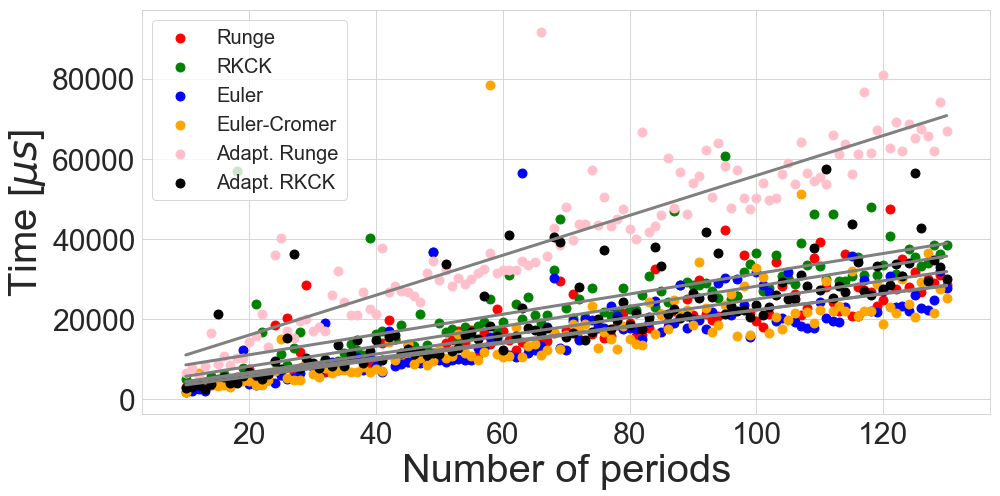

In [17]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14*ncols, 7*nrows))

axes.scatter(run_time_data, run_time_runge, color='red', label='Runge', s=80)
axes.scatter(run_time_data, run_time_rkck, color='green', label='RKCK', s=80)
axes.scatter(run_time_data, run_time_euler, color='blue', label='Euler', s=80)
axes.scatter(run_time_data, run_time_eulercromer, color='orange', label='Euler-Cromer', s=80)
axes.scatter(run_time_data, run_time_adapt_runge, color='pink', label='Adapt. Runge', s=80)
axes.scatter(run_time_data, run_time_adapt_rkck, color='black', label='Adapt. RKCK', s=80)


axes.plot(run_time_data, line_runge, color='grey', linewidth=3)
axes.plot(run_time_data, line_rkck, color='grey', linewidth=3)
axes.plot(run_time_data, line_euler, color='grey', linewidth=3)
axes.plot(run_time_data, line_eulercromer, color='grey', linewidth=3)
axes.plot(run_time_data, line_adapt_runge, color='grey', linewidth=3)
axes.plot(run_time_data, line_adapt_rkck, color='grey', linewidth=3)

axes.set_xlabel('Number of periods', fontsize=40)
axes.set_ylabel('Time [$\mu s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\runtime_all.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

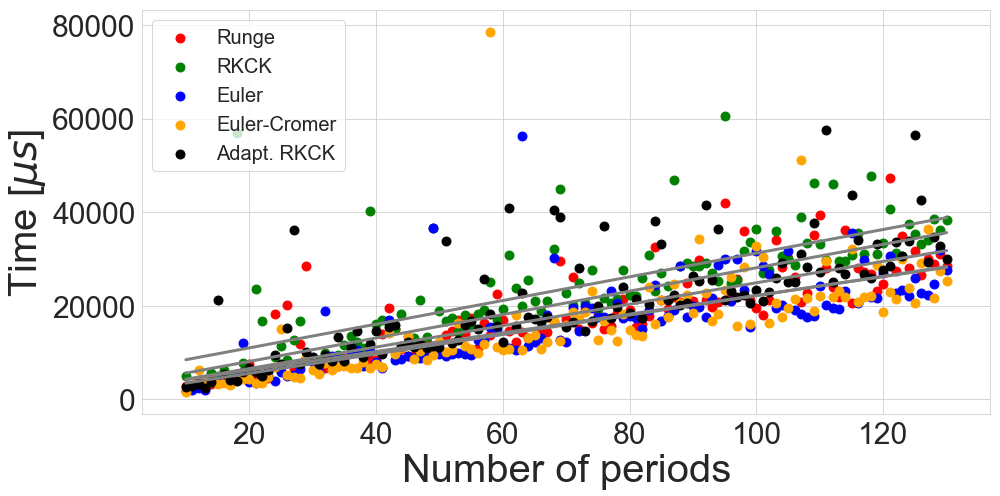

In [18]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14*ncols, 7*nrows))

axes.scatter(run_time_data, run_time_runge, color='red', label='Runge', s=80)
axes.scatter(run_time_data, run_time_rkck, color='green', label='RKCK', s=80)
axes.scatter(run_time_data, run_time_euler, color='blue', label='Euler', s=80)
axes.scatter(run_time_data, run_time_eulercromer, color='orange', label='Euler-Cromer', s=80)
axes.scatter(run_time_data, run_time_adapt_rkck, color='black', label='Adapt. RKCK', s=80)

axes.plot(run_time_data, line_runge, color='grey', linewidth=3)
axes.plot(run_time_data, line_rkck, color='grey', linewidth=3)
axes.plot(run_time_data, line_euler, color='grey', linewidth=3)
axes.plot(run_time_data, line_eulercromer, color='grey', linewidth=3)
axes.plot(run_time_data, line_adapt_rkck, color='grey', linewidth=3)

axes.set_xlabel('Number of periods', fontsize=40)
axes.set_ylabel('Time [$\mu s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\runtime_all_wo_runge.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

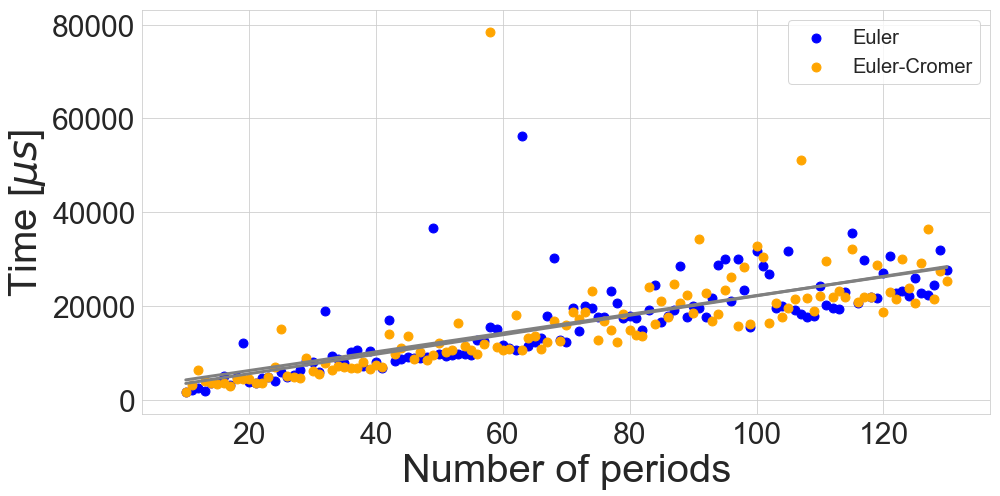

In [19]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14*ncols, 7*nrows))

axes.scatter(run_time_data, run_time_euler, color='blue', label='Euler', s=80)
axes.scatter(run_time_data, run_time_eulercromer, color='orange', label='Euler-Cromer', s=80)

axes.plot(run_time_data, line_euler, color='grey', linewidth=3)
axes.plot(run_time_data, line_eulercromer, color='grey', linewidth=3)

axes.set_xlabel('Number of periods', fontsize=40)
axes.set_ylabel('Time [$\mu s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\runtime_all_both.' + image_format, format=image_format, dpi=image_dpi)
plt.show()